<a href="https://colab.research.google.com/github/Joshitha475/colab-se-lab-1/blob/main/ML_LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1

In [3]:
from google.colab import files
files.upload()  # Upload kaggle.json here



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"psaijoshitha","key":"cae1d7d46ab5f8786c0c760435a60aee"}'}

In [4]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d uciml/iris
!unzip iris.zip


Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 8.00MB/s]
Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


STEP 2

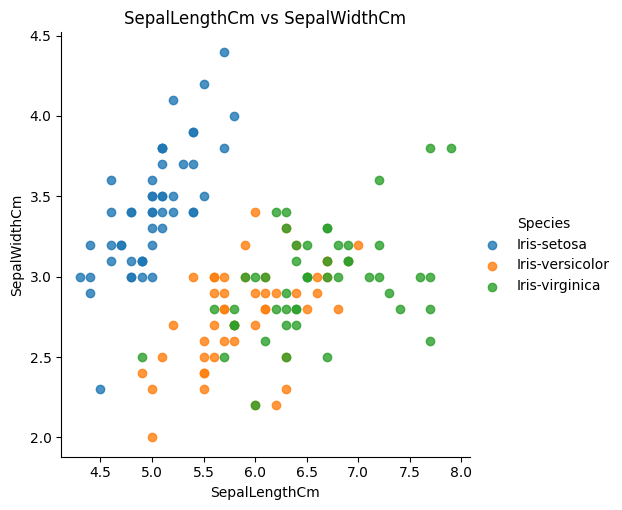

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

# Load the dataset
data = pd.read_csv('Iris.csv')

# Specify the features you want to plot
features_to_plot = ['SepalLengthCm', 'SepalWidthCm']

# Plot the specified features
sns.lmplot(x=features_to_plot[0], y=features_to_plot[1], data=data, hue='Species', fit_reg=False)
plt.title(f'{features_to_plot[0]} vs {features_to_plot[1]}')
plt.show()


STEP 3

In [10]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np


In [11]:
def plot_svm_kernels(X, y, kernels):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.ravel()

    for i, kernel in enumerate(kernels):
        svm = SVC(kernel=kernel)
        svm.fit(X, y)

        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)

        x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
        y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))
        Z = svm.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)

        axes[i].contourf(xx, yy, Z, alpha=0.8)
        axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', s=20)
        axes[i].set_title(f'SVM with {kernel} kernel')

    plt.tight_layout()
    plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

# Load the dataset
data = pd.read_csv('Iris.csv')

# Encode the target variable
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

# Prepare the data
X = data.drop(columns=['Species', 'Id'])  # Also drop 'Id' column if present
y = data['Species']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to plot SVM results
def plot_svm_kernels(X, y, kernels):
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # Adjusted for 4 kernels
    axes = axes.ravel()

    for i, kernel in enumerate(kernels):
        svm = SVC(kernel=kernel)
        svm


STEP 4

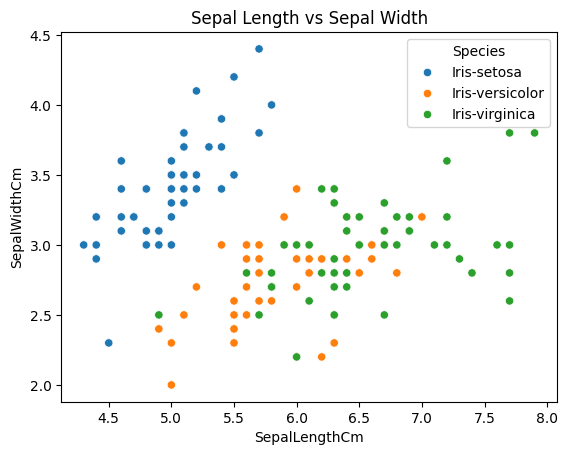

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Iris.csv')

# Plot SepalLengthCm vs SepalWidthCm
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=data)
plt.title('Sepal Length vs Sepal Width')
plt.show()

